In [1]:
import pandas as pd
import seaborn as sns

import math
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, roc_curve, plot_roc_curve, plot_confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import math

from matplotlib import pyplot
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, roc_curve, plot_roc_curve, confusion_matrix, plot_confusion_matrix, classification_report, recall_score, f1_score, accuracy_score
from sklearn import tree
from sklearn.linear_model import LinearRegression

from IPython.display import Image
from sklearn.ensemble import BaggingClassifier




In [2]:
#!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from scipy.spatial.distance import cosine


In [3]:
#! pip install statsmodels

In [4]:
dat = pd.read_csv('C:/Users/dwaip/Desktop/Mendoza Yr 2/Sem 3/Python/Final Project/garments_worker_productivity_v4.csv', encoding = 'UTF-8')

In [5]:
dat = pd.DataFrame(dat)


In [6]:
dat.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,Target
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,yes
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,yes
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,yes
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,yes
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,yes


In [7]:
dat.isna().any()

date                     False
quarter                  False
department               False
day                      False
team                     False
targeted_productivity    False
smv                      False
wip                       True
over_time                False
incentive                False
idle_time                False
idle_men                 False
no_of_style_change       False
no_of_workers            False
actual_productivity      False
Target                   False
dtype: bool

In [8]:
    dat["wip"]=dat["wip"].fillna(0)
dat.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
Target                    object
dtype: object

In [10]:
round(1 - len(dat.dropna())/len(dat), 3)

0.423

In [9]:
dat.astype({'date': 'datetime64[ns]'})
dat.astype({'targeted_productivity': 'int64'})
dat.astype({'targeted_productivity': 'int64'})
dat["team"] = dat["team"].astype('object')

#dat['month_year'] = pd.to_datetime(dat['date']).dt.to_period('M')

In [10]:
dat.dtypes

date                      object
quarter                   object
department                object
day                       object
team                      object
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
Target                    object
dtype: object

<AxesSubplot:xlabel='incentive', ylabel='actual_productivity'>

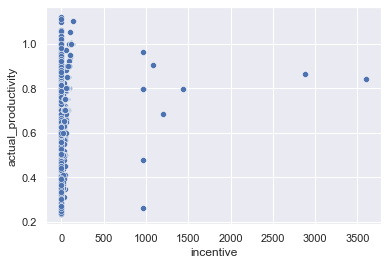

In [11]:
sns.set()
sns.scatterplot(x="incentive", y="actual_productivity", data=dat)

<AxesSubplot:xlabel='over_time', ylabel='actual_productivity'>

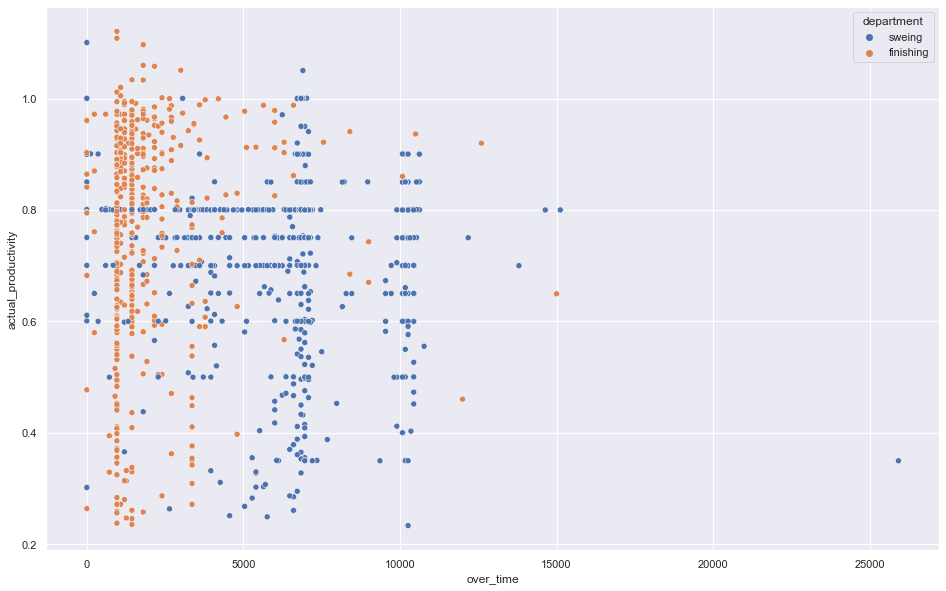

In [12]:
sns.set()
plt.figure(figsize = (16,10))
sns.scatterplot(x="over_time", y="actual_productivity", hue="department", data=dat)

In [13]:
rcParams['figure.figsize'] = 15,8
sns.set()
#plt.figure(figsize = (16,10))
sns.lineplot(x="quarter", y="over_time",hue="department",  data=dat)

NameError: name 'rcParams' is not defined

In [ ]:
rcParams['figure.figsize'] = 15,8
sns.set()
#plt.figure(figsize = (16,10))
sns.lineplot(x="quarter", y="actual_productivity", hue="department", data=dat)

In [ ]:
sns.scatterplot(x="no_of_workers", y="actual_productivity", hue="department", data=dat)

In [ ]:
rcParams['figure.figsize'] = 15,8
sns.set()
#plt.figure(figsize = (16,10))
sns.lineplot(x="day", y="actual_productivity", hue="department", data=dat)

<AxesSubplot:xlabel='idle_men', ylabel='actual_productivity'>

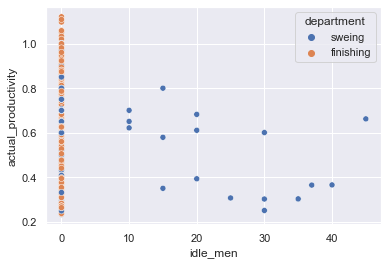

In [14]:
sns.scatterplot(x="idle_men", y="actual_productivity", hue="department", data=dat)

<AxesSubplot:xlabel='no_of_style_change', ylabel='actual_productivity'>

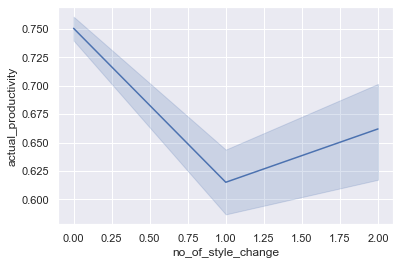

In [15]:
sns.lineplot(x="no_of_style_change", y="actual_productivity", data=dat)

<AxesSubplot:xlabel='Target', ylabel='count'>

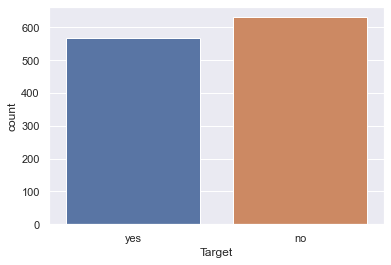

In [16]:
sns.countplot(x="Target", data=dat)

<AxesSubplot:xlabel='quarter', ylabel='actual_productivity'>

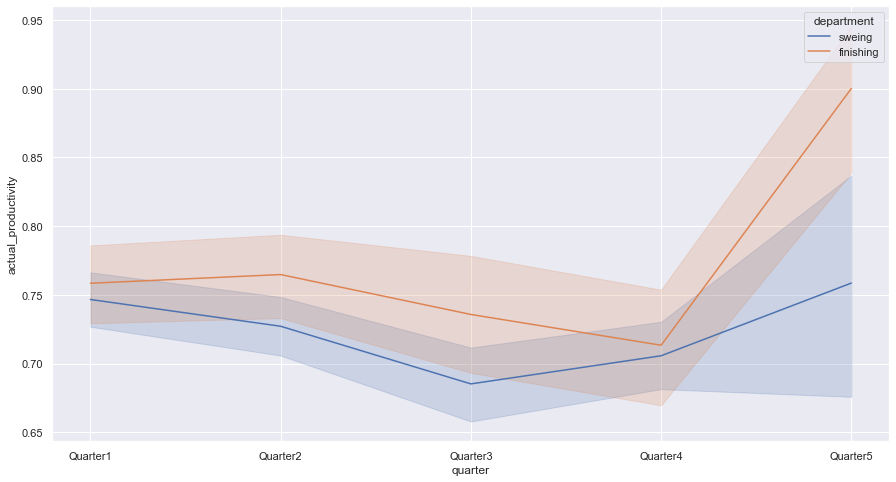

In [17]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8
sns.set()
#plt.figure(figsize = (16,10))
sns.lineplot(x="quarter", y="actual_productivity", hue="department", data=dat)

In [18]:
#I feel we should drop date from our model. The accuracy might go down a bit but they skew the data IMO
#dat_model=dat.drop(['date'], 1)

Split Data

In [19]:
dat = dat.drop(columns = 'actual_productivity')

In [20]:
Train, Test = train_test_split(dat, stratify=dat.Target, test_size=.20,random_state=345)

In [21]:
dat.groupby('Target').size()

Target
no     631
yes    566
dtype: int64

In [22]:
round(dat.groupby('Target').size()/len(dat), 3)

Target
no     0.527
yes    0.473
dtype: float64

In [23]:
Train, Test = train_test_split(dat, 
                               stratify = dat.Target,
                               test_size = 0.20, 
                               random_state = 345)

In [24]:
display(len(Train),
        len(Test))

957

240

In [25]:
display(round(len(Train)/len(dat), 3), 
        round(len(Test)/len(dat), 3))

0.799

0.201

In [26]:
display(Train.groupby('Target').size())
round(Train.groupby('Target').size()/len(Train), 3)

Target
no     504
yes    453
dtype: int64

Target
no     0.527
yes    0.473
dtype: float64

In [27]:
display(Test.groupby('Target').size())
round(Test.groupby('Target').size()/len(Test), 3)

Target
no     127
yes    113
dtype: int64

Target
no     0.529
yes    0.471
dtype: float64

In [28]:
np.random.seed(345) # to create reproducible results

maj_class = np.where(Train.Target == "no")[0]
min_class = np.where(Train.Target == "yes")[0]

resample = np.random.choice(maj_class, size = len(min_class), replace = False)

TrainDS = pd.concat([Train.iloc[min_class], Train.iloc[resample]])

TrainDS.shape

(906, 15)

In [29]:
display(TrainDS.groupby('Target').size())
round(TrainDS.groupby('Target').size()/len(TrainDS), 3)

Target
no     453
yes    453
dtype: int64

Target
no     0.5
yes    0.5
dtype: float64

# Checking stuff

In [30]:
round(1 - len(TrainDS.dropna())/len(TrainDS), 3)

0.0

In [31]:
round(TrainDS.isna().sum()/len(TrainDS), 3)

date                     0.0
quarter                  0.0
department               0.0
day                      0.0
team                     0.0
targeted_productivity    0.0
smv                      0.0
wip                      0.0
over_time                0.0
incentive                0.0
idle_time                0.0
idle_men                 0.0
no_of_style_change       0.0
no_of_workers            0.0
Target                   0.0
dtype: float64

In [32]:
display(TrainDS.head(), TrainDS.dtypes, TrainDS.shape)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,Target
303,1/18/2015,Quarter3,sweing,Sunday,7,0.8,48.84,624.0,10170,50,0.0,0,0,56.5,yes
1052,3/4/2015,Quarter1,finishing,Wednesday,4,0.7,3.94,0.0,960,0,0.0,0,0,8.0,yes
521,1/31/2015,Quarter5,finishing,Saturday,3,0.8,3.94,0.0,960,0,0.0,0,0,8.0,yes
353,1/21/2015,Quarter3,finishing,Wednesday,2,0.7,3.94,0.0,5100,0,0.0,0,0,17.0,yes
69,1/5/2015,Quarter1,sweing,Monday,8,0.8,25.90,1047.0,6780,38,0.0,0,0,56.5,yes


date                      object
quarter                   object
department                object
day                       object
team                      object
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
Target                    object
dtype: object

(906, 15)

Preprocessing Train Data

In [33]:
#One Hot Encoding
enc = OneHotEncoder(handle_unknown = 'ignore', 
                    sparse = False)

enc_raw_data_train = TrainDS.drop(columns = 'Target').select_dtypes(include = ['object', 'category'])

enc = enc.fit(enc_raw_data_train)

encoded_data_train = pd.DataFrame(enc.transform(enc_raw_data_train))

encoded_data_train.columns = enc.get_feature_names(enc_raw_data_train.columns)
encoded_data_train.index = enc_raw_data_train.index

TrainDS_ImpConstEnc = pd.concat([TrainDS.drop(enc_raw_data_train.columns, axis = 1), encoded_data_train], axis = 1)

TrainDS_ImpConstEnc.head()

c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,Target,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
303,0.8,48.84,624.0,10170,50,0.0,0,0,56.5,yes,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1052,0.7,3.94,0.0,960,0,0.0,0,0,8.0,yes,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
521,0.8,3.94,0.0,960,0,0.0,0,0,8.0,yes,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353,0.7,3.94,0.0,5100,0,0.0,0,0,17.0,yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,0.8,25.90,1047.0,6780,38,0.0,0,0,56.5,yes,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [34]:
#Variance Threshold
selector = VarianceThreshold()

sel_raw_data_train = TrainDS_ImpConstEnc.drop(columns = 'Target')

selector = selector.fit(sel_raw_data_train)

selected_data_train = sel_raw_data_train.iloc[:, selector.get_support(indices = True)]

TrainDS_ImpConstEncSel = pd.concat([TrainDS_ImpConstEnc.drop(sel_raw_data_train.columns, axis = 1), selected_data_train], axis = 1)

TrainDS_ImpConstEncSel.head()

,Target,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
303,yes,0.8,48.84,624.0,10170,50,0.0,0,0,56.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1052,yes,0.7,3.94,0.0,960,0,0.0,0,0,8.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
521,yes,0.8,3.94,0.0,960,0,0.0,0,0,8.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353,yes,0.7,3.94,0.0,5100,0,0.0,0,0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,yes,0.8,25.90,1047.0,6780,38,0.0,0,0,56.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [35]:
Test.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,Target
109,1/7/2015,Quarter1,finishing,Wednesday,3,0.75,4.15,0.0,2700,0,0.0,0,0,15.0,yes
1014,3/2/2015,Quarter1,finishing,Monday,8,0.75,4.60,0.0,3360,0,0.0,0,0,8.0,no
1174,3/11/2015,Quarter2,finishing,Wednesday,11,0.80,2.90,0.0,2400,0,0.0,0,0,10.0,yes
433,1/25/2015,Quarter4,finishing,Sunday,12,0.70,4.08,0.0,1620,0,0.0,0,0,9.0,no
895,2/23/2015,Quarter4,sweing,Monday,8,0.70,29.40,1094.0,6840,40,0.0,0,2,57.0,no


In [36]:
scaler = RobustScaler()

sca_raw_data_train = TrainDS_ImpConstEncSel.drop(columns = 'Target').select_dtypes(exclude = ['object', 'category'])

scaler = scaler.fit(sca_raw_data_train)

scaled_data_train = pd.DataFrame(scaler.transform(sca_raw_data_train))

scaled_data_train.columns = sca_raw_data_train.columns
scaled_data_train.index = sca_raw_data_train.index

TrainDS_ImpConstEncSel = pd.concat([TrainDS_ImpConstEncSel.drop(sca_raw_data_train.columns, axis = 1), scaled_data_train], axis = 1)

TrainDS_ImpConstEncSel.head()

,Target,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
303,yes,0.5,1.767368,0.056829,1.115385,1.00,0.0,0.0,0.0,0.468750,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1052,yes,-0.5,-0.595789,-0.515124,-0.571429,0.00,0.0,0.0,0.0,-0.541667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
521,yes,0.5,-0.595789,-0.515124,-0.571429,0.00,0.0,0.0,0.0,-0.541667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353,yes,-0.5,-0.595789,-0.515124,0.186813,0.00,0.0,0.0,0.0,-0.354167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,yes,0.5,0.560000,0.444546,0.494505,0.76,0.0,0.0,0.0,0.468750,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Test Preprocessing

In [37]:
#One Hot Encoding
enc = OneHotEncoder(handle_unknown = 'ignore', 
                    sparse = False)

enc_raw_data_train = Test.drop(columns = 'Target').select_dtypes(include = ['object', 'category'])

enc = enc.fit(enc_raw_data_train)

encoded_data_train = pd.DataFrame(enc.transform(enc_raw_data_train))

encoded_data_train.columns = enc.get_feature_names(enc_raw_data_train.columns)
encoded_data_train.index = enc_raw_data_train.index

Test_Enc = pd.concat([Test.drop(enc_raw_data_train.columns, axis = 1), encoded_data_train], axis = 1)

Test_Enc.head()

c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,Target,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
109,0.75,4.15,0.0,2700,0,0.0,0,0,15.0,yes,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014,0.75,4.60,0.0,3360,0,0.0,0,0,8.0,no,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1174,0.80,2.90,0.0,2400,0,0.0,0,0,10.0,yes,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
433,0.70,4.08,0.0,1620,0,0.0,0,0,9.0,no,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
895,0.70,29.40,1094.0,6840,40,0.0,0,2,57.0,no,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
scaler = RobustScaler()

sca_raw_data_train = Test_Enc.drop(columns = 'Target').select_dtypes(exclude = ['object', 'category'])

scaler = scaler.fit(sca_raw_data_train)

scaled_data_train = pd.DataFrame(scaler.transform(sca_raw_data_train))

scaled_data_train.columns = sca_raw_data_train.columns
scaled_data_train.index = sca_raw_data_train.index

Test_Enc = pd.concat([Test_Enc.drop(sca_raw_data_train.columns, axis = 1), scaled_data_train], axis = 1)

Test_Enc.head()

,Target,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
109,yes,0.0,-0.557114,-0.560656,-0.201087,0.0,0.0,0.0,0.0,-0.391753,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014,no,0.0,-0.534166,-0.560656,-0.081522,0.0,0.0,0.0,0.0,-0.536082,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1174,yes,0.5,-0.620857,-0.560656,-0.255435,0.0,0.0,0.0,0.0,-0.494845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
433,no,-0.5,-0.560683,-0.560656,-0.396739,0.0,0.0,0.0,0.0,-0.515464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
895,no,-0.5,0.730495,0.464169,0.548913,0.8,0.0,0.0,2.0,0.474227,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Running Models

In [39]:
# set up data and labels
X_train = TrainDS_ImpConstEncSel.drop(columns = 'Target')
y_train = TrainDS_ImpConstEncSel.Target

X_test = Test_Enc.drop(columns = 'Target')
y_test = Test_Enc.Target

pos_label = 'yes'

# set up scoring metric
scoring_metric = 'balanced_accuracy'

# set up classifiers and tuning parameters
names = ['Decision Tree', 'AdaBoost', 'Random Forest','Logistic Regression','Bagging']
classifiers = [DecisionTreeClassifier(random_state = 345), 
               AdaBoostClassifier(random_state = 345), 
               RandomForestClassifier(random_state = 345),LogisticRegression(random_state = 345),BaggingClassifier(random_state = 345)]
param_grids = [{'max_depth': [2, 3, 4], 'criterion': ['gini', 'entropy']}, 
               {'n_estimators': [25, 50, 100, 150, 300]}, 
               {'max_depth': [2, 3, 4], 'max_features': [None, 'sqrt', 'log2'], 'n_estimators': [50, 100, 150]},
               {'penalty': ['none', 'l2'],'C':[100, 10, 1.0, 0.1, 0.01]},
              {'n_estimators': [10, 100, 1000]}]

# create empty lists for storing outcomes
models = []
preds = []
probs = []
BAs = []
AUCs = []
FPRs = []
TPRs = []
timings = []

# train classifiers and generate test predictions/probabilities
for i, eachClassifier in enumerate(classifiers):
    
    print('Now working on model ', i + 1, ' of ', len(classifiers), ': ', names[i], sep = '')
    
    # define cross-validation/parameter tuning settings
    search = GridSearchCV(eachClassifier, 
                          param_grids[i], 
                          cv = 5, # using (Stratified)KFold by default (with 5 folds)
                          scoring = scoring_metric,
                          n_jobs = -1) # use parallel processing
    
    model = search.fit(X_train, y_train)
    pred = search.predict(X_test)
    prob = search.predict_proba(X_test)[:, 1]
    
    models.append(model)
    preds.append(pred)
    probs.append(prob)
    
    BAs.append(balanced_accuracy_score(y_test, pred))
    AUCs.append(roc_auc_score(y_test, prob))
    
    FPR, TPR, _ = roc_curve(y_test, prob, pos_label = pos_label)
    
    FPRs.append(FPR)
    TPRs.append(TPR)
    
    timings.append(model.refit_time_)
    
print('Finished!')

Now working on model 1 of 5: Decision Tree
Now working on model 2 of 5: AdaBoost


c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


Now working on model 3 of 5: Random Forest
Now working on model 4 of 5: Logistic Regression
Now working on model 5 of 5: Bagging
Finished!


In [40]:
results = pd.DataFrame({'Classifier': names, 
                        'Balanced Accuracy': BAs, 
                        'AUC': AUCs, 
                        'TPR': TPRs, 
                        'FPR': FPRs, 
                        'Refit Time': timings}).sort_values(['Balanced Accuracy', 'AUC'], ascending = False)

display(round(results[['Classifier', 'Refit Time', 'Balanced Accuracy', 'AUC']], 3))

,Classifier,Refit Time,Balanced Accuracy,AUC
1,AdaBoost,0.288,0.805,0.913
3,Logistic Regression,0.022,0.765,0.816
4,Bagging,3.507,0.764,0.885
2,Random Forest,0.096,0.763,0.878
0,Decision Tree,0.004,0.762,0.857


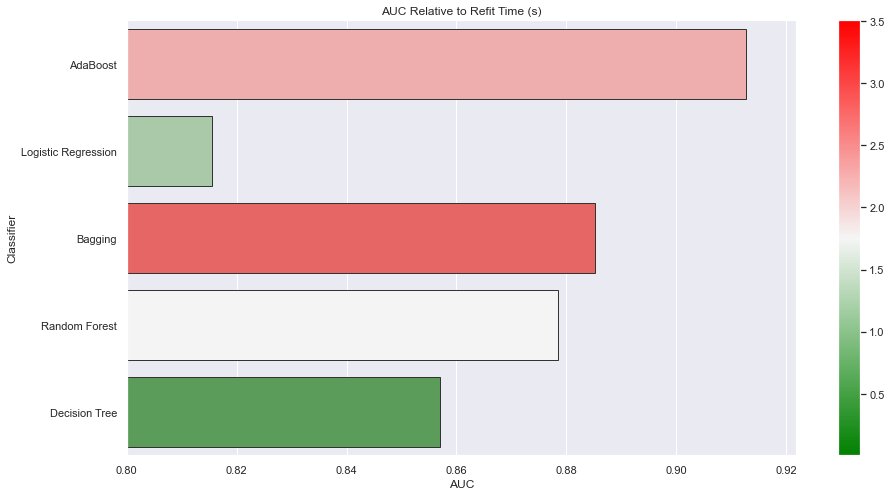

In [41]:
greenToRed = LinearSegmentedColormap.from_list('', ['green', 'whitesmoke', 'red'])
cm.register_cmap('green_to_red', greenToRed)

normRTs = plt.Normalize(results['Refit Time'].min(), results['Refit Time'].max())
smRTs = plt.cm.ScalarMappable(cmap = 'green_to_red', norm = normRTs)

ax = sns.barplot(y = 'Classifier', 
                 x = 'AUC', 
                 hue = 'Refit Time', 
                 dodge = False, 
                 palette = 'green_to_red', 
                 edgecolor = '.2', 
                 data = results)

ax.get_legend().remove()
ax.figure.colorbar(smRTs)
ax.set(title = 'AUC Relative to Refit Time (s)')
ax.set(xlim = (math.floor(results.AUC.min() * 10) * 10/100, 
               results.AUC.max() * 1.01))

plt.show()

c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in

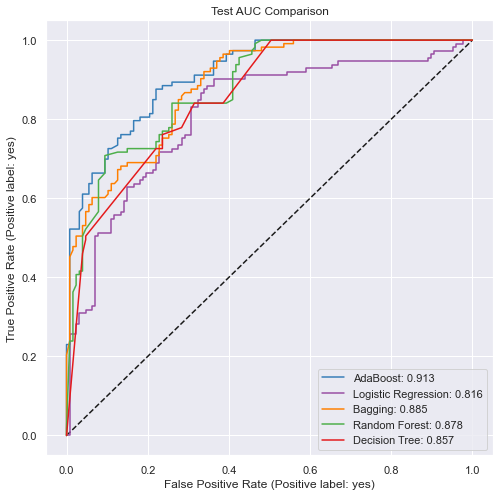

In [42]:
# defining a custom function for reuse later
def Custom_ROC_Plot (results, X_test, y_test, title, figwidth = 8, figheight = 8):

    fig, ax = plt.subplots(figsize = (figwidth, figheight))

    ax.plot(ax.get_xlim(), ax.get_ylim(), ls = '--', c = 'k')
    ax.set(title = title)

    for i in results.index:
        plot_roc_curve(models[i], 
                       X_test, 
                       y_test, 
                       color = cm.Set1(i), 
                       label = results.loc[i, 'Classifier'] + ': {:.3f}'.format(results.loc[i, 'AUC']), 
                       ax = ax)
        
    return([fig, ax])

fig, ax = Custom_ROC_Plot(results, X_test, y_test, title = 'Test AUC Comparison')

In [43]:
best_index = results.index[0]

In [44]:
models[best_index].best_estimator_

AdaBoostClassifier(n_estimators=150, random_state=345)

In [45]:
tuning_results = pd.DataFrame(models[best_index].cv_results_).sort_values('rank_test_score')

round(tuning_results, 3).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.499,0.015,0.034,0.005,150,{'n_estimators': 150},0.753,0.779,0.812,0.801,0.823,0.794,0.025,1
4,0.731,0.056,0.041,0.001,300,{'n_estimators': 300},0.769,0.757,0.812,0.807,0.823,0.794,0.026,1
2,0.364,0.019,0.046,0.012,100,{'n_estimators': 100},0.736,0.801,0.790,0.785,0.845,0.792,0.035,3
0,0.084,0.006,0.021,0.003,25,{'n_estimators': 25},0.742,0.768,0.724,0.834,0.790,0.772,0.039,4
1,0.165,0.004,0.028,0.012,50,{'n_estimators': 50},0.736,0.757,0.757,0.768,0.823,0.768,0.029,5


In [46]:
len(tuning_results)

5

c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


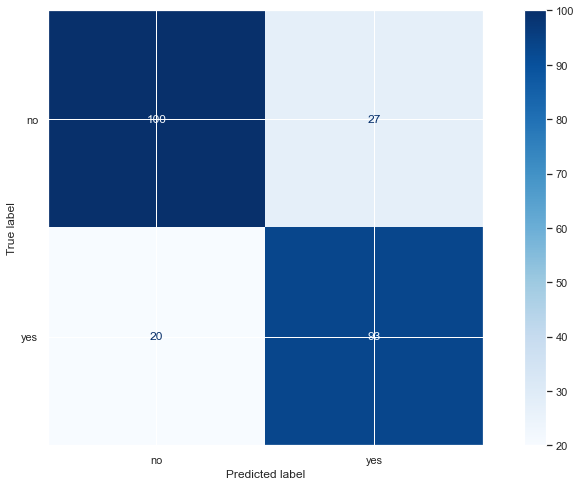

In [47]:
# note: for a simple printed matrix, you can use:
# confusion_matrix(y_test, preds[best_index])

plot_confusion_matrix(models[best_index], 
                      X_test, 
                      y_test,
                      cmap = plt.cm.Blues,
                      values_format = 'd')

In [48]:
TP = 93 # True Positive
TN = 100 # True Negative
FP = 20  # False Positive
FN = 27  # False Negative

test_metrics = pd.DataFrame({
    'Sensitivity': [TP/(TP+FN)], 
    'Specificity': [TN/(TN+FP)], 
    'Positive Predictive Value': [TP/(TP+FP)], 
    'Negative Predictive Value': [TN/(TN+FN)], 
    'F1 Score': [TP/(TP+.5*(FP+FN))], 
    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)]})

test_metrics['Balanced Accuracy'] = np.mean([test_metrics.Sensitivity, test_metrics.Specificity])

round(test_metrics, 3)

,Sensitivity,Specificity,Positive Predictive Value,Negative Predictive Value,F1 Score,Accuracy,Balanced Accuracy
0,0.775,0.833,0.823,0.787,0.798,0.804,0.804


In [49]:
results.loc[best_index, ['Classifier', 'Balanced Accuracy']]

Classifier           AdaBoost
Balanced Accuracy    0.805205
Name: 1, dtype: object

<AxesSubplot:xlabel='importance', ylabel='feature'>

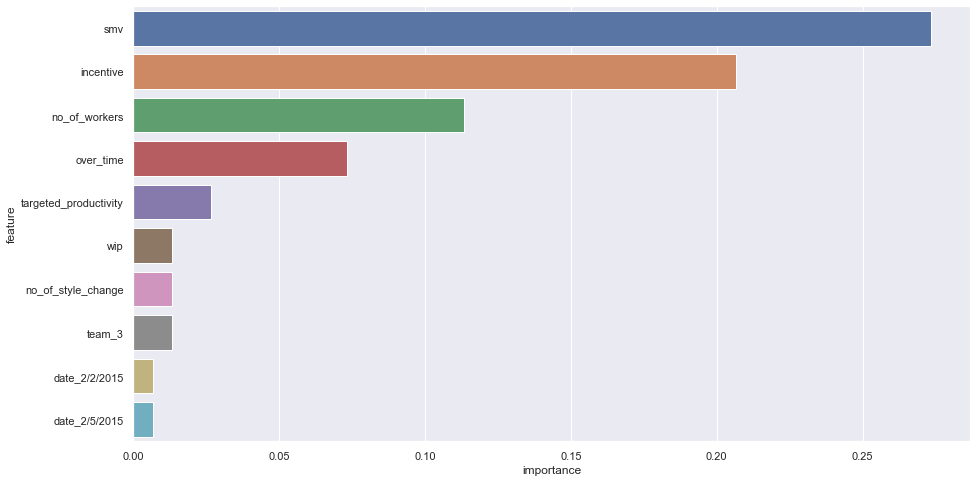

In [50]:
# for models with feature importances
if hasattr(models[best_index].best_estimator_, 'feature_importances_'):
    var_imp = pd.DataFrame({
        'feature': X_test.columns, 
        'importance': models[best_index].best_estimator_.feature_importances_}).sort_values('importance', ascending = False)
# for models with coefficients (directional) -- note: for interpretation and potential caveats, see https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html
elif hasattr(models[best_index].best_estimator_, 'coef_'):
    var_imp = pd.DataFrame({
        'feature': X_test.columns, 
        'importance_abs': abs(models[best_index].best_estimator_.coef_[0]), 
        'importance': models[best_index].best_estimator_.coef_[0]}).sort_values('importance_abs', ascending = False)
    
sns.barplot(y = 'feature', 
            x = 'importance', 
            data = var_imp.head(10))

In [51]:
best_index

1

In [52]:
modelOut = pd.DataFrame({
    'Prob': probs[best_index],
    'ModelPreds': preds[best_index],
    'Actuals': y_test
})

In [53]:
yesPreds = modelOut.sort_values('Prob').query('ModelPreds == "no"')

yesPreds.sort_values('Prob', ascending = False).tail(20)



,Prob,ModelPreds,Actuals
991,0.490099,no,no
17,0.490011,no,no
895,0.489808,no,no
748,0.489763,no,no
993,0.489670,no,no
821,0.489283,no,no
389,0.489090,no,no
1097,0.489058,no,no
1142,0.489058,no,no
810,0.488937,no,no


#Definite No

In [54]:
yesPreds.sort_values('Prob', ascending = False).head(20)

,Prob,ModelPreds,Actuals
733,0.499904,no,yes
394,0.499880,no,yes
1072,0.499852,no,yes
920,0.499827,no,no
769,0.499779,no,yes
479,0.499615,no,yes
503,0.499608,no,yes
328,0.499385,no,no
808,0.499205,no,no
1177,0.499190,no,yes


These are the ones where the model isn't so great. Require manual inspection